# **Descrição**

Análise de dados de clientes de uma empresa de credito, estudo das caracteristicas que possam a ajudar na escolha de clientes para diminuição de inadimplência para liberação de crédito. 

# Importação das Bibliotecas

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# Carregamento e geração de dados

In [11]:
df = pd.read_csv('/kaggle/input/projeto-final/Python_M10_support material.csv', na_values='na')
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


# Exploração dos dados

In [12]:
df.shape

(10127, 16)

In [13]:
df[df['default']==0].shape

(8500, 16)

In [14]:
df[df['default']==1].shape

(1627, 16)

In [15]:
qtd_total,_= df.shape
qtd_adimplentes,_=df[df['default']==0].shape
qtd_inadimplentes,_=df[df['default']==1].shape

In [16]:
print(f"a proporção clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total,2)}%")
print(f"a proporção clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total,2)}%")

a proporção clientes adimplentes é de 83.93%
a proporção clientes inadimplentes é de 16.07%


In [17]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [18]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [19]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [20]:
df.drop('id',axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


In [21]:
df.head

<bound method NDFrame.head of               id  default  idade sexo  dependentes         escolaridade  \
0      768805383        0     45    M            3         ensino medio   
1      818770008        0     49    F            5             mestrado   
2      713982108        0     51    M            3             mestrado   
3      769911858        0     40    F            4         ensino medio   
4      709106358        0     40    M            3  sem educacao formal   
...          ...      ...    ...  ...          ...                  ...   
10122  772366833        0     50    M            2             mestrado   
10123  710638233        1     41    M            2                  NaN   
10124  716506083        1     44    F            1         ensino medio   
10125  717406983        1     30    M            2             mestrado   
10126  714337233        1     43    F            2             mestrado   

      estado_civil   salario_anual tipo_cartao  meses_de_relacionamen

In [22]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [23]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

    stats_dados_faltantes = [] 
    for col in df.columns:
        if df[col].isna().any():
            qtd,_=df[df[col].isna()].shape
            total,_=df.shape
            dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem":round(100 * qtd/total, 2)}}
            stats_dados_faltantes.append(dict_dados_faltantes)
    for stat in stats_dados_faltantes:
        print(stat)

In [24]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [25]:
stats_dados_faltantes(df=df[df['default']==0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [26]:
stats_dados_faltantes(df=df[df['default']==1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


#  Etapa de limpeza e transformação dos dados.

As colunas **limite_credito** e **valor_transacoes_12m** estão sendo interpretadas como objetos ao invés de numeral.

In [27]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [28]:
df[['limite_credito','valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


In [29]:
fn = lambda valor: float(valor.replace(".","").replace(",","."))

valores_originais = ['12.691,51','8.256,96','3.418,56','4.716,22']
valores_limpos = list(map(fn,valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '4.716,22']
[12691.51, 8256.96, 3418.56, 4716.22]


In [30]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

In [31]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

In [32]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


In [33]:
df.drop('id',axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


In [34]:
df.dropna(inplace=True)

In [35]:
df.shape

(7081, 16)

In [36]:
df[df['default']==0].shape

(5968, 16)

In [37]:
df[df['default']==1].shape

(1113, 16)

In [38]:
qtd_total_novo,_=df.shape
qtd_adimplentes_novo,_=df[df['default']==0].shape
qtd_inadimplentes_novo,_=df[df['default']==1].shape

In [39]:
print(f"A proporção adimplentes ativos é de {round(100 * qtd_adimplentes/qtd_total,2)}%")
print(f"A nova proporção de clientes adimplentes é de {round(100 * qtd_adimplentes_novo/qtd_total_novo,2)}%")

print(f"A proporção inadimplentes é de {round(100 * qtd_inadimplentes/qtd_total,2)}%")
print(f"A nova proporção de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo/qtd_total_novo,2)}%")


A proporção adimplentes ativos é de 83.93%
A nova proporção de clientes adimplentes é de 84.28%
A proporção inadimplentes é de 16.07%
A nova proporção de clientes inadimplentes é de 15.72%


#  Etapa de análise e visualização de dados.

In [40]:
df_adimplente = df[df['default']==0]
df_inadimplente = df[df['default']==1]

In [41]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


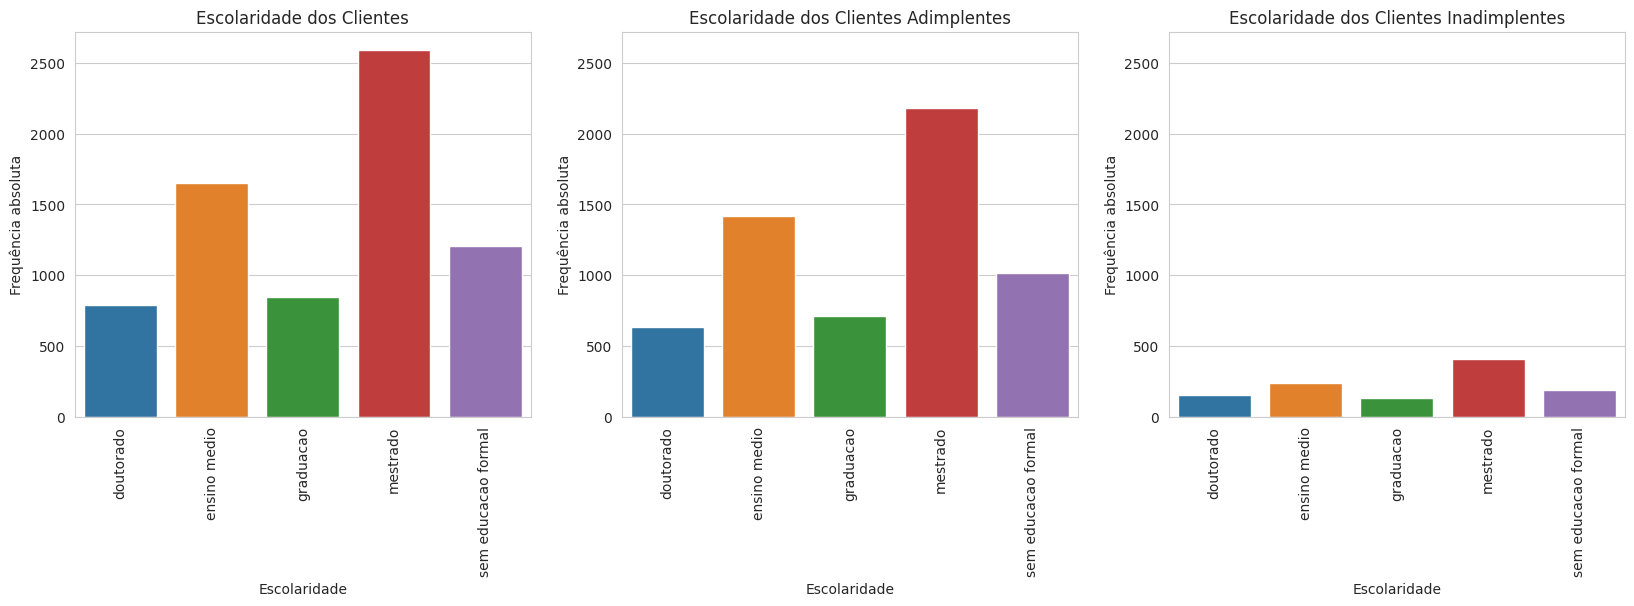

In [42]:
# Gráfico 1 - Visualização da influência do nível de Escolaridade na inadimplência


coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20,5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:
    
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns=[coluna,'frequencia_absoluta']
    df_to_plot.sort_values(by=[coluna], inplace=True)
        
    f = sns.barplot(x=coluna,y='frequencia_absoluta',data=df_to_plot, ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(),ylabel='Frequência absoluta')
    f.set_xticklabels(labels=df_to_plot[coluna], rotation=90)
    
    _,max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f> max_y else max_y
    f.set(ylim=(0, max_y))
    
    eixo +=1
    
figura.show()
    


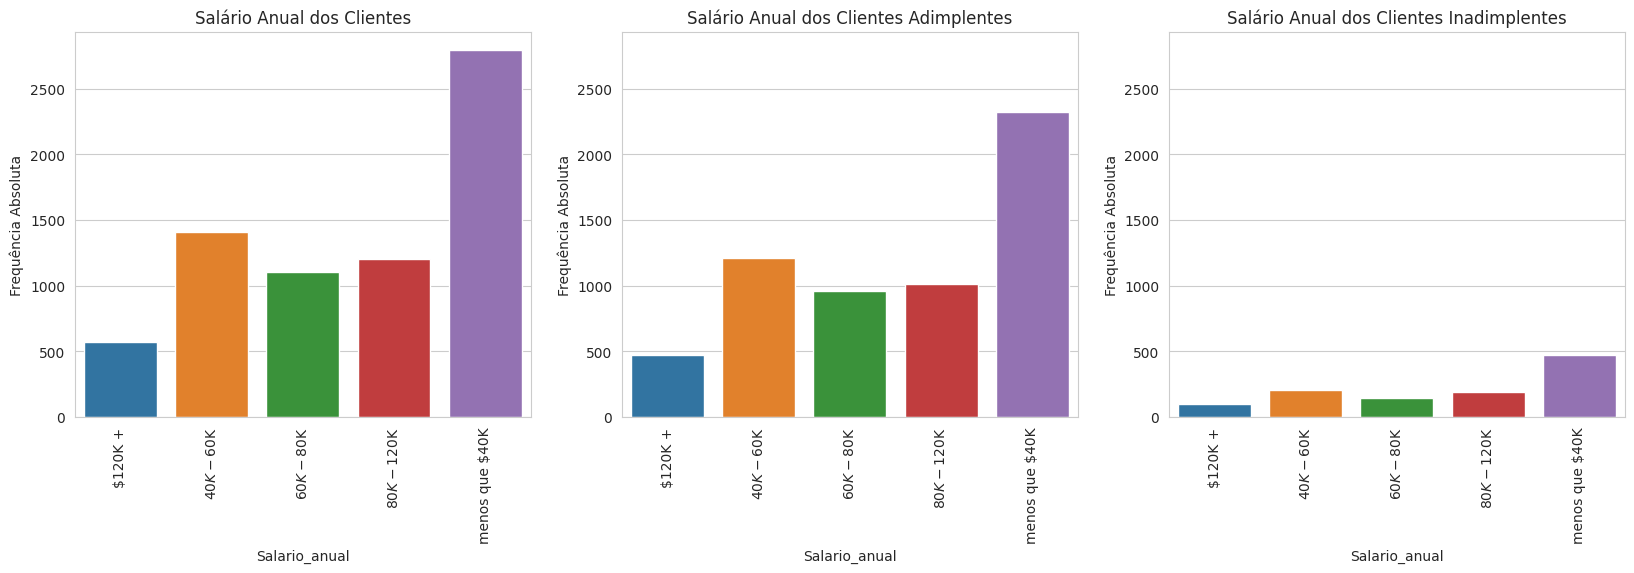

In [43]:
# Gráfico 2 -  Visualização da influência do Sálario na inadimplência

coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().reset_index() 
  df_to_plot.columns = [coluna, 'frequencia_absoluta']
  df_to_plot.sort_values(by=[coluna], inplace=True)    

  f = sns.barplot(x=coluna, y='frequencia_absoluta', data=df_to_plot, ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

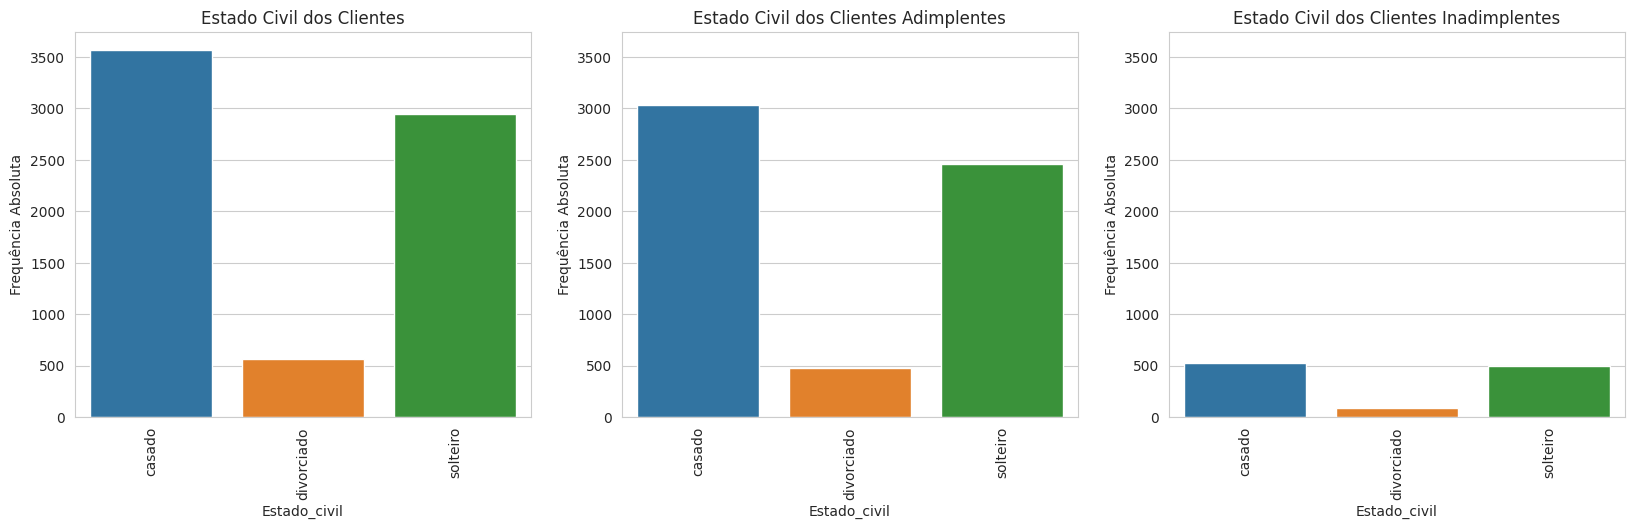

In [44]:
# Gráfico 3 - Visualização da influência do estado civil na inadimplência.

coluna = 'estado_civil'
titulos = ['Estado Civil dos Clientes', 'Estado Civil dos Clientes Adimplentes', 'Estado Civil dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().reset_index() 
  df_to_plot.columns = [coluna, 'frequencia_absoluta']
  df_to_plot.sort_values(by=[coluna], inplace=True)    

  f = sns.barplot(x=coluna, y='frequencia_absoluta', data=df_to_plot, ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

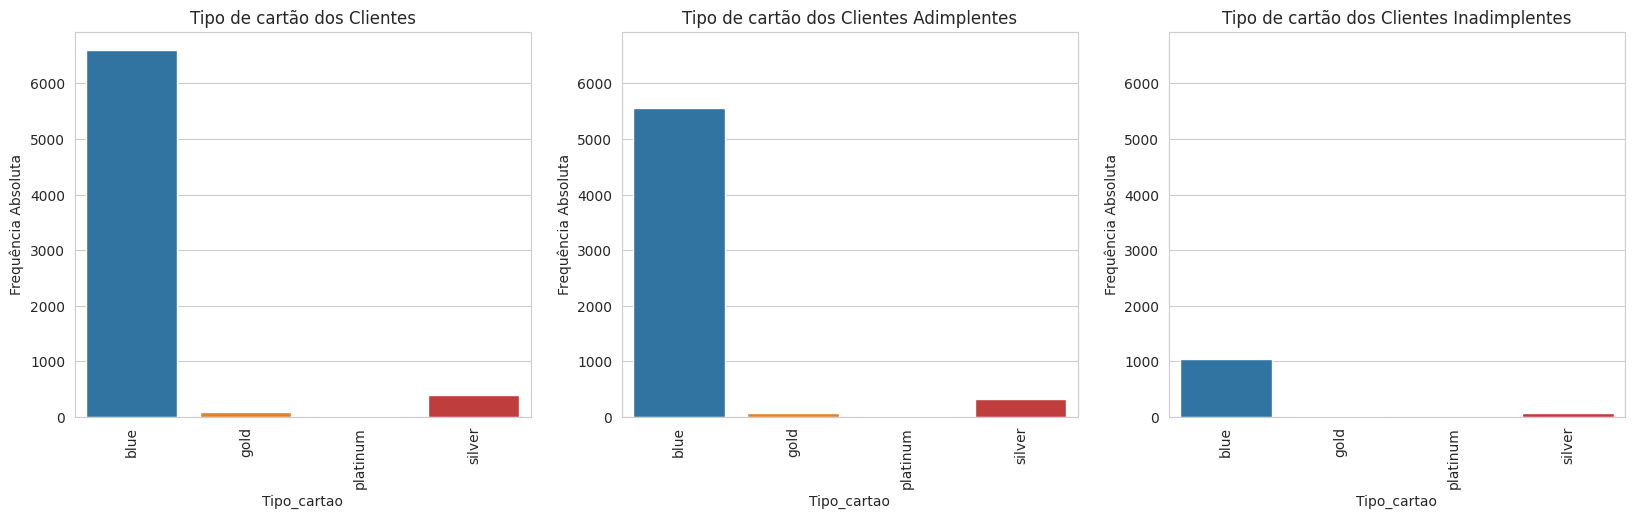

In [45]:
# Gráfico 4 - Visualização da influência do tipo de cartão na inadimplência.

coluna = 'tipo_cartao'
titulos = ['Tipo de cartão dos Clientes', 'Tipo de cartão dos Clientes Adimplentes', 'Tipo de cartão dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().reset_index() 
  df_to_plot.columns = [coluna, 'frequencia_absoluta']
  df_to_plot.sort_values(by=[coluna], inplace=True)    

  f = sns.barplot(x=coluna, y='frequencia_absoluta', data=df_to_plot, ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

In [46]:
df.drop(['id','default'],axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


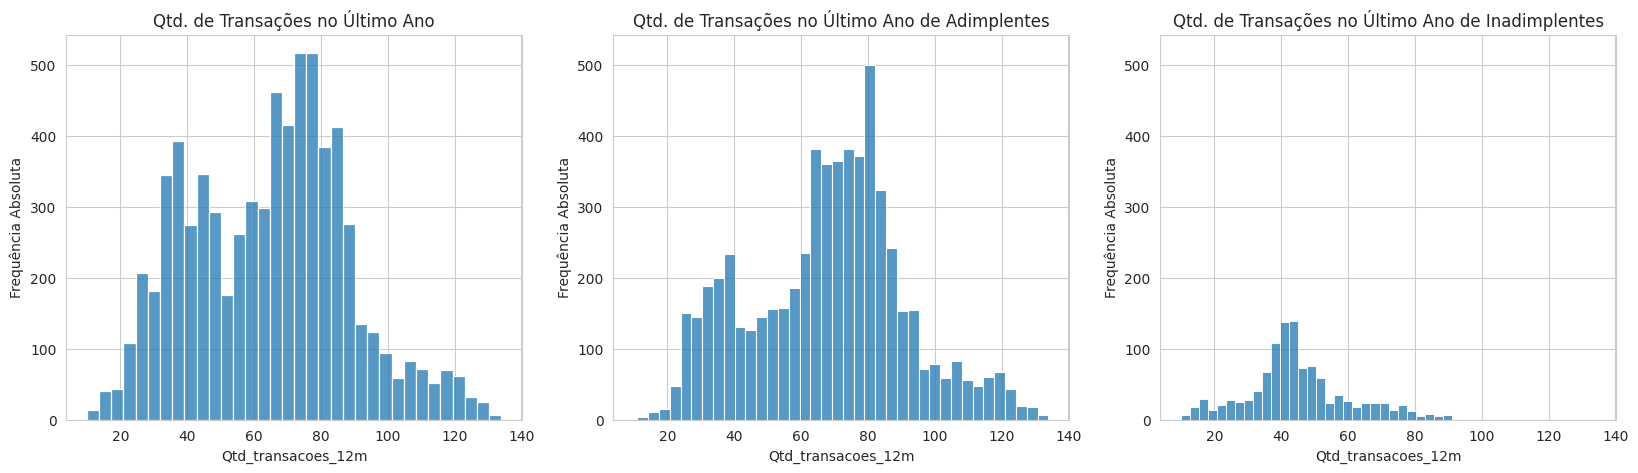

In [47]:
# Gráfico 5 - Visualização da influência da quantidade de transações na inadimplência.

coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


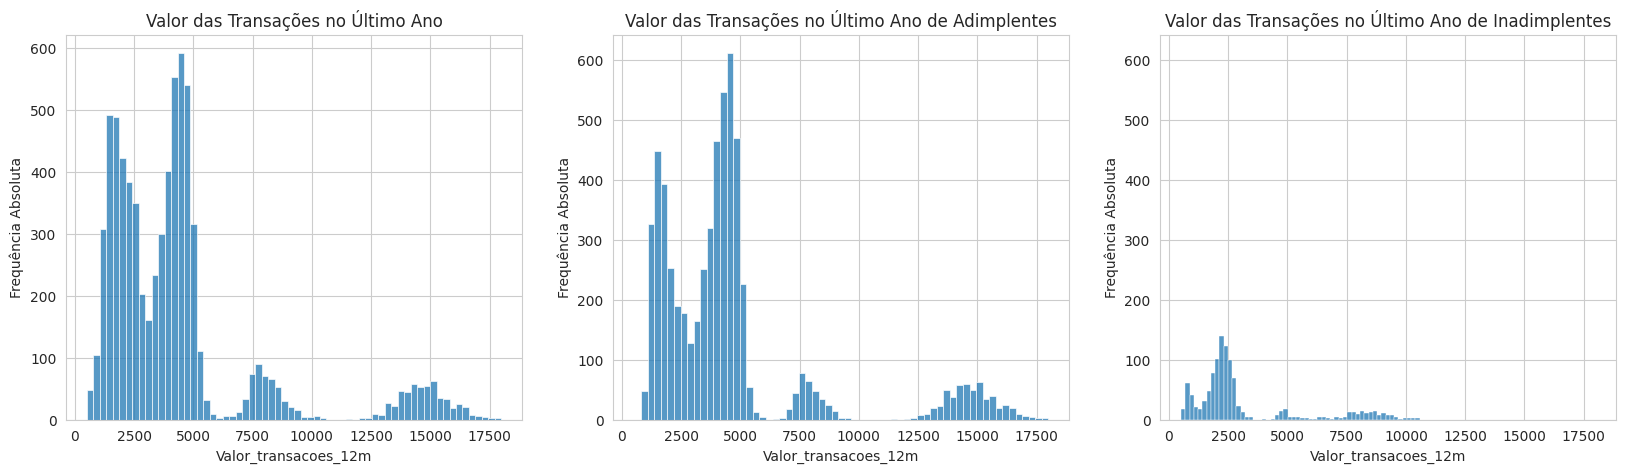

In [48]:
# Gráfico 6 - Visualização da influência dos valores das transações nos últimos 12 meses

coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()


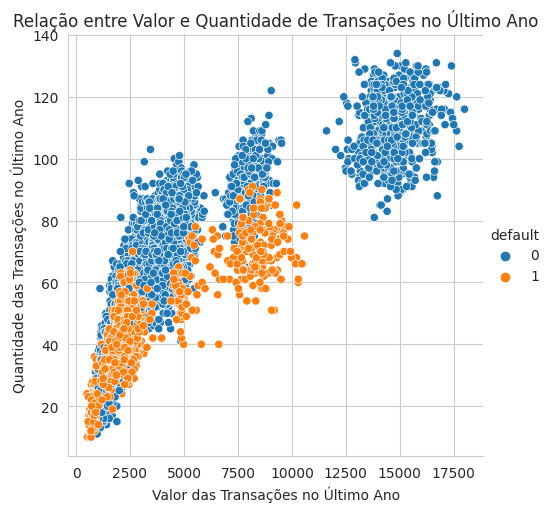

In [51]:
# Gráfico 7 - Visualização da influência do valor de transações e quantidade de transações nos últimos 12 meses.

f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
        title ='Relação entre Valor e Quantidade de Transações no Último Ano', 
        xlabel = 'Valor das Transações no Último Ano', 
        ylabel= 'Quantidade das Transações no Último Ano')

#  Análise final dos insights gerados

O que faz um cliente deixar de pagar suas contas em uma instituição financeira de acordo com amostra analisada?

Em relação escolaridade:

Analisando o Gráfico 1 há uma concentração em clientes com ensino superior, havendo ainda muitos clientes sem escolaridade. A distribuição da quantidade de clientes inadimplentes se mantém independentemente do nível escolaridade. A escolaridade não influencia na inadimplência.

Em relação ao salário anual:

No gráfico 2, maioria do clientes tem uma renda menor que 40 mil anual, o montante anual do salário dos clientes não explica a inadimplência, o comportamento da distribuição por salário anual se mantém a mesma nos inadimplentes.

Em relação ao estado civil:

O estado civil não influencia na inadimplência, no gráfico 3 o comportamento da distribuição por estado civil se mantém a mesma nos inadimplentes.


Em relação ao tipo de cartão:

Há uma grande concentração de clientes com o cartão azul, no gráfico 4 o comportamento da distribuição por tipo de cartão se mantém a mesma nos inadimplentes.


Em relação a quantidade de transações em 12 meses, o gráfico 5 mostra que os clientes que têm a quantidade de transações concentradas entre 20 e 60 tem maior possibilidade de serem inadimplentes.

Em relação ao valor das transações em 12 meses, na análise do gráfico 6 mostra que há uma concentração em transações nos valores entre 1000 mil e 5000 mil. Podemos também ver que há uma um padrão de comportamento mostrando que maioria do inadimplentes possuem transações no valor entre 1500 mil e 2500 mil. Clientes que possuem valor transacional alto não tendem a ser inadimplentes. 

No cruzamento das colunas de número e valor das transações, no gráfico 7 fica claro que cliente com valor e quantidade de transações altos não são inadimplentes. Há dois grupos concentrados, um entre 7500 mil e 10.000 mil e outro entre 1000mil e 5000 mil esse último mais concentrado com menos transações, podendo assim concluir que quando menor o número de transações e menor valor existe mais possibilidade de inadimplência.
